 # Course project I

I have conducted an analysis of geographic and population data for the communes and cantons of Switzerland in a JupyterLab. The dataset contains a wide range of information, including population per commune, population density, age distribution of the population, language of the population, land use, and topographical and location data.

The purpose of this project is to apply the knowledge gained from the first chapter of the course, *"01. Introduction to data analysis with python"* to analyze the data and draw meaningful insights from it. To make it easier to access the results, I have created indices for all the questions. When I consider it was a contribution, make sure to include detailed comments in the header of my code to provide additional context and documentation for myself and others who may use or review my code. I find that including explanations of the analyses presented in my code, as well as documenting interesting functions or unique ways of accomplishing tasks, is a helpful way to ensure that I can easily reference and build upon my work in the future. 

The analysis is divided into five units, with the first two units focused on exploring the data through summary statistics and visualizations of the variables. The next unit focuses on visual exploration of the data using graphs, followed by a short probability exercise. Finally, the last unit covers exercises to practice the use of matrices in preparation for future units. Throughout the analysis, I have used various libraries learned in the course, such as Pandas, Matplotlib, and Seaborn, to help visualize and interpret the data.

# A. An overview of the dataset

## 1. Import the data as a Pandas DataFrame and name it as df

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the DataFrame
df = pd.read_csv("p1_communes.csv")

## 2. Check the number of rows and columns

Below it is possible to observe that the data frame is comprises:
* 2202 rows, each row was assigned an index from 0 to 2201
* 17 columns
* 9 columns with decimal numbers, 5 with integers and 3 with objects
* Missing values, including:
  - Three missing values in the "*Canton*" column
  - Eleven missing values in the "*Language*" column  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Canton                      2199 non-null   object 
 1   Commune                     2202 non-null   object 
 2   Language                    2191 non-null   object 
 3   Residents                   2202 non-null   int64  
 4   Population density per km²  2202 non-null   float64
 5   0-19 years                  2202 non-null   float64
 6   20-64 years                 2202 non-null   float64
 7   65 years or over            2202 non-null   float64
 8   Private households          2202 non-null   int64  
 9   Surface area in km²         2202 non-null   float64
 10  Settlement area             2202 non-null   float64
 11  Agricultural area           2202 non-null   float64
 12  Wooded area                 2202 non-null   float64
 13  Unproductive area           2202 

## 3. Display the first few entries of the DataFrame

In [4]:
df.head(5)

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583
3,ZH,Hausen am Albis,de,3701,272.132353,21.804918,60.686301,17.508781,1546,13.60,12.692590,55.906090,28.833456,2.567865,2682900,1233100,653
4,ZH,Hedingen,de,3734,571.822358,21.772898,61.756829,16.470273,1540,6.53,19.817073,46.341463,33.231707,0.609756,2676400,1239000,543


## 4. Obtain the index labels, and then show the column names as a list

In [5]:
# Index labels
index_labels = df.index.tolist()  # index.tolist() ref. https://bit.ly/3RlFZDe
#print(index_labels) # is a long list of 2202

In [6]:
# Column names as a list
column_names = df.columns.tolist()
print(column_names)

['Canton', 'Commune', 'Language', 'Residents', 'Population density per km²', '0-19 years', '20-64 years', '65 years or over', 'Private households', 'Surface area in km²', 'Settlement area', 'Agricultural area', 'Wooded area', 'Unproductive area', 'East coordinate', 'North coordinate', 'Elevation']


## 5. Check the data type for each column

In [7]:
df.dtypes

Canton                         object
Commune                        object
Language                       object
Residents                       int64
Population density per km²    float64
0-19 years                    float64
20-64 years                   float64
65 years or over              float64
Private households              int64
Surface area in km²           float64
Settlement area               float64
Agricultural area             float64
Wooded area                   float64
Unproductive area             float64
East coordinate                 int64
North coordinate                int64
Elevation                       int64
dtype: object

## 6. Check if there are any missing values and show the rows that contain the missing values

From exercise A.2 we know that the columns '*Canton*' has 3 missing values and '*Language*' 11.

In [8]:
# Rows with missing values
df[df.isnull().any(axis=1)].index.tolist()

[155, 156, 157, 158, 440, 704, 757, 1133, 1165, 1626, 2079]

In [9]:
# Details of the rows containing the missing values
df[df.isnull().any(axis=1)]

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
155,ZH,Stammheim,NaN,2747,114.649416,21.405169,58.281762,20.313069,1125,23.96,9.056761,55.801336,34.557596,0.584307,2702400,1276500,455
156,ZH,Wädenswil,NaN,24341,682.968575,19.740356,59.944127,20.315517,10371,35.64,19.336706,63.265880,15.064643,2.332771,2693400,1231600,641
157,ZH,Elgg,NaN,4903,201.025010,20.762798,60.473180,18.764022,2121,24.39,9.545268,46.907005,43.138058,0.409668,2707700,1260900,598
158,ZH,Horgen,NaN,22665,735.160558,20.657401,60.480918,18.861681,9685,30.83,18.456049,38.858255,39.506974,3.178722,2687800,1234900,624
440,NaN,Thurnen,NaN,1922,323.025210,20.759625,58.324662,20.915713,814,5.95,13.949580,79.159664,6.050420,0.840336,2605300,1184700,558
704,NaN,Villaz,NaN,2287,148.217758,24.398776,61.346742,14.254482,897,15.44,8.808290,70.336788,20.401554,0.453368,2563200,1174400,727
757,NaN,Prez,NaN,2236,139.401496,25.000000,61.672630,13.327370,839,16.04,6.924517,68.808484,23.268871,0.998129,2567700,1181700,651
1133,GR,Bergün Filisur,NaN,905,4.759651,16.574586,59.668508,23.756906,397,190.14,0.977815,19.824414,27.541794,51.655977,2776700,1166700,2273
1165,GR,Rheinwald,NaN,577,4.217220,16.984402,54.072790,28.942808,266,136.82,1.124334,34.328685,14.448419,50.098562,2744500,1157500,2192
1626,TI,Riviera,NaN,4220,48.780488,20.071090,61.445498,18.483412,1774,86.58,4.008317,7.034770,65.553887,23.403026,2718700,1128900,1458


## 7. If necessary remove any observations to ensure that there are no missing values and the values in each column are of the same data type

I have observed that in the previous exercise, the dataset contains very few missing observations. Therefore, I have removed the rows that had missing values from the original database to ensure the quality of the data. Furthermore, I have noticed that the dataset contains float64 and int64 numerical variables. I have maintained the format of these variables because I am aware of their nature and how calculations are made with these variables. It is important to keep the original format of these variables to ensure accuracy in the calculations made with the dataset.

In [10]:
# Remove the rows with missing values from the original database
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191 entries, 0 to 2201
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Canton                      2191 non-null   object 
 1   Commune                     2191 non-null   object 
 2   Language                    2191 non-null   object 
 3   Residents                   2191 non-null   int64  
 4   Population density per km²  2191 non-null   float64
 5   0-19 years                  2191 non-null   float64
 6   20-64 years                 2191 non-null   float64
 7   65 years or over            2191 non-null   float64
 8   Private households          2191 non-null   int64  
 9   Surface area in km²         2191 non-null   float64
 10  Settlement area             2191 non-null   float64
 11  Agricultural area           2191 non-null   float64
 12  Wooded area                 2191 non-null   float64
 13  Unproductive area           2191 

In [12]:
# Example of how to change the data type in a numeric column to int64
#df["Surface area in km²"] = df["Surface area in km²"].astype(int)

# B. Exploration: numerical summaries, indexing and grouping

## 1. Obtain the mean, minimum and maximum value for each column containing numerical data. Your output should preferably show only the three requested statistics and not the full table of descriptive statistics.

From the previous exercise A.6 I know the database has different data type, 9 float64 and 5 int64. To enhance the visualization of the entire list of columns, I transposed the dataframe. Additionally, I implemented a reduction in the number of decimals, which further improved the clarity of the data representation.

This dataframe presents population and geographic information for the communes in the 26 cantons of Switzerland. It underscores the extensive range in the number of resident, as evidenced by the low and high resident figures of 11 and 415367, respectively.

In [13]:
# Columns containing numerical data
df_numerical = df.select_dtypes(include=[int, float])

In [14]:
# Mean, minimum, and maximum value for each column
df_std = df_numerical.agg([pd.Series.mean, pd.Series.min, pd.Series.max])
df_std.round(decimals=3).T

,mean,min,max
Residents,3865.300,11.000,415367.000
Population density per km²,433.424,0.895,12669.052
0-19 years,20.585,0.000,37.778
20-64 years,60.371,18.182,77.922
65 years or over,19.044,6.271,81.818
Private households,1702.485,10.000,201252.000
Surface area in km²,17.973,0.310,438.630
Settlement area,14.883,0.139,97.260
Agricultural area,45.930,0.000,91.509
Wooded area,32.576,0.000,88.235


## 2. List the 10 most populated communes, ordered by their number of residents.

To answer this question, I constructed a pandas DataFrame that encompasses the information of the most populated communes along with other relevant columns. Additionally, I created another list that displays the ranking of the most populated communes, including only the name of the commune and its number of residents.

In [15]:
# Dataframe of the 10 most populated communes, ordered by their number of residents. 
most_populated_communes = df.sort_values("Residents", ascending=False).head(10)
most_populated_communes

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
154,ZH,Zürich,de,415367,4723.837143,17.388719,67.684241,14.927040,201252,87.93,61.972472,10.101240,26.231373,1.694915,2683100,1247100,457
2124,GE,Genève,fr,201818,12669.052100,17.946863,66.186366,15.866771,89672,15.92,92.133417,1.510384,3.146633,3.209566,2500000,1117900,402
910,BS,Basel,de,172258,7222.557652,16.834632,64.067852,19.097517,86350,23.85,86.521557,3.850984,3.641691,5.985768,2611300,1267600,266
1749,VD,Lausanne,fr,139111,3361.793137,19.569984,65.735995,14.694021,68940,41.38,44.694223,16.050278,39.062122,0.193377,2538200,1152400,667
194,BE,Bern,de,133883,2593.626501,16.693680,66.047220,17.259099,63414,51.62,45.030033,18.988568,33.617516,2.363883,2600100,1199700,556
141,ZH,Winterthur,de,111851,1643.176142,19.862138,63.889460,16.248402,50776,68.07,33.587786,24.823840,40.443335,1.145038,2697200,1261700,481
535,LU,Luzern,de,81691,2807.250859,16.127848,64.419581,19.452571,41139,29.10,47.815617,27.863777,22.325421,1.995184,2666200,1211800,490
1053,SG,St. Gallen,de,75833,1925.672930,18.076563,64.303140,17.620297,36992,39.38,40.808543,28.960081,28.451564,1.779812,2746200,1254600,688
1582,TI,Lugano,it,63185,832.915898,17.450344,60.397246,22.152410,30755,75.93,18.662806,9.607792,66.122664,5.606739,2717100,1095900,789
207,BE,Biel/Bienne,de,55159,2603.067485,19.362207,62.337968,18.299824,26339,21.19,45.518868,7.877358,45.377358,1.226415,2585500,1221200,478


In [16]:
# List of the 10 most populated communes, ordered by their number of residents.
most_populated_communes_list = most_populated_communes[["Commune","Residents"]]
most_populated_communes_list.values.tolist()

[['Zürich', 415367],
 ['Genève', 201818],
 ['Basel', 172258],
 ['Lausanne', 139111],
 ['Bern', 133883],
 ['Winterthur', 111851],
 ['Luzern', 81691],
 ['St. Gallen', 75833],
 ['Lugano', 63185],
 ['Biel/Bienne', 55159]]

## 3. List the 10 least populated communes, ordered by their number of residents

Here I used the same approach as in the previous question. 

In [17]:
# Dataframe of the 10 most populated communes, ordered by their number of residents 
least_populated_communes = df.sort_values("Residents").head(10)
least_populated_communes

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1546,TI,Corippo,it,11,1.426719,0.000000,18.181818,81.818182,10,7.71,0.259740,3.506494,64.935065,31.298701,2708100,1121500,1134
875,SO,Kammersrohr,de,28,29.473684,10.714286,67.857143,21.428571,12,0.95,3.191489,56.382979,40.425532,0.000000,2611700,1233700,618
2011,VS,Bister,de,33,5.679862,9.090909,60.606061,30.303030,16,5.81,1.206897,15.862069,42.586207,40.344828,2648200,1134500,1777
366,BE,Schelten,de,36,6.474820,22.222222,63.888889,13.888889,13,5.56,1.985560,38.628159,59.205776,0.180505,2608500,1242500,907
370,BE,Rebévelier,de,41,11.549296,29.268293,46.341463,24.390244,16,3.55,0.564972,59.887006,39.548023,0.000000,2580000,1237500,990
485,BE,Berken,de,45,32.374101,11.111111,62.222222,26.666667,21,1.39,11.428571,52.857143,30.000000,5.714286,2620500,1230500,441
1629,TI,Cerentino,it,45,2.238806,13.333333,53.333333,33.333333,26,20.10,1.343284,4.975124,71.741294,21.940299,2685300,1128800,1498
342,BE,Clavaleyres,de,46,46.000000,13.043478,58.695652,28.260870,17,1.00,5.000000,80.000000,15.000000,0.000000,2573500,1194200,466
1627,TI,Bosco/Gurin,it,46,2.089959,8.695652,60.869565,30.434783,25,22.01,0.635786,24.386921,30.881017,44.096276,2681100,1130000,2019
1160,GR,Lohn (GR),rm,46,5.630355,13.043478,63.043478,23.913043,19,8.17,1.105651,57.371007,34.275184,7.248157,2752200,1168600,1760


In [18]:
# List of the 10 most populated communes, ordered by their number of residents 
least_populated_communes_list = least_populated_communes[["Commune","Residents"]]
least_populated_communes_list.values.tolist()

[['Corippo', 11],
 ['Kammersrohr', 28],
 ['Bister', 33],
 ['Schelten', 36],
 ['Rebévelier', 41],
 ['Berken', 45],
 ['Cerentino', 45],
 ['Clavaleyres', 46],
 ['Bosco/Gurin', 46],
 ['Lohn (GR)', 46]]

## 4. Group the communes by canton and save them into separate .csv files, e.g. a ZH.csv with all the data for communes in Zurich (Do not include the .csv files in your submission).

In [19]:
# Groups per canton
canton_data = df.groupby("Canton")

In [20]:
# Separate .csv per canton of the communal data
for name, group in canton_data:
    group.to_csv(f"{name}.csv", index=False)

## 5. Compute the mean population density for each canton and rank the cantons from most dense to least dense.

Here I add a new column to the existing dataFrame that contains the full canton names rather than relying solely on the canton code, which may not provide enough information for effective analysis. This can be achieved by joining the canton names to the existing dataFrame or by merging them to create more informative results.

The table shows a significant variation in population density among Swiss cantons, with Basel-Stadt (BS) having 54 time more population dentisity than Graubünden (GB).

In [21]:
# Mean population density for each canton
population_dens = df.groupby("Canton").agg({"Population density per km²":"mean"})

In [22]:
# Ranking of the cantons from most dense to least dense
population_dens_cantons = population_dens.sort_values(by="Population density per km²", ascending=False).round(decimals=1)

In [23]:
# Code of the cantons as a list
column_names = population_dens.index.tolist()
print(column_names)

['AG', 'AI', 'AR', 'BE', 'BL', 'BS', 'FR', 'GE', 'GL', 'GR', 'JU', 'LU', 'NE', 'NW', 'OW', 'SG', 'SH', 'SO', 'SZ', 'TG', 'TI', 'UR', 'VD', 'VS', 'ZG', 'ZH']


In [24]:
# Create a new column with full name of the cantons

# Create the DataFrame with the full name
full_names =pd.DataFrame({'Canton': ['AG', 'AR', 'AI', 'BE', 'BL', 'BS', 'FR', 'GE', 'GL', 'GR',
                                        'JU', 'LU', 'NE', 'NW', 'OW', 'SG', 'SH', 'SZ', 'SO', 'TG',
                                        'TI', 'UR', 'VD', 'VS', 'ZG', 'ZH'],
                             "Name": ["Aargau", "Appenzell Ausserrhoden", "Appenzell Innerrhoden", "Bern", "Basel-Landschaft",
                                           "Basel-Stadt", "Fribourg", "Geneva", "Glarus", "Graubünden", "Jura",
                                           "Lucerne", "Neuchâtel", "Nidwalden", "Obwalden", "St. Gallen", "Schaffhausen",
                                           "Schwyz", "Solothurn", "Thurgau", "Ticino", "Uri", "Vaud", "Valais",
                                           "Zürich", "Zug"]}) # Ref. name of the cantons https://bit.ly/3xgKl5l

population_dens_name = pd.merge(population_dens, full_names, on="Canton")
population_dens_name = population_dens_name[["Canton", "Name", "Population density per km²"]]
population_dens_name

,Canton,Name,Population density per km²
0,AG,Aargau,509.434515
1,AI,Appenzell Innerrhoden,120.671860
2,AR,Appenzell Ausserrhoden,267.894190
3,BE,Bern,292.678141
4,BL,Basel-Landschaft,565.737021
5,BS,Basel-Stadt,3236.627458
6,FR,Fribourg,273.969971
7,GE,Geneva,1802.562712
8,GL,Glarus,89.224440
9,GR,Graubünden,62.352241


## 6. Compute the number of communes in each canton where more than 50 percent of their populations are aged between 20 and 64 years old.

In [25]:
# Selecion of the comune with more than 50 percent of their populations are aged between 20 and 64 years old.
commun_with_maj_20_64_aged = df[df["20-64 years"] > 50]

In [26]:
# Number of communes in each canton where more than 50 percent of their populations are aged between 20 and 64 years old
num_commun_maj_20_64_aged = commun_with_maj_20_64_aged.groupby("Canton").agg({"Commune":"count"})

In [27]:
# Merge the full name to the canton code
num_commun_maj_20_64_aged_name = pd.merge(num_commun_maj_20_64_aged, full_names, on="Canton")
num_commun_maj_20_64_aged_name = num_commun_maj_20_64_aged_name[["Canton", "Name", "Commune"]]
num_commun_maj_20_64_aged_name.sort_values("Commune", ascending=False)

,Canton,Name,Commune
3,BE,Bern,339
22,VD,Vaud,309
0,AG,Aargau,210
25,ZH,Zug,158
6,FR,Fribourg,131
23,VS,Valais,124
20,TI,Ticino,113
17,SO,Solothurn,109
9,GR,Graubünden,100
4,BL,Basel-Landschaft,86


## 7. Compute the difference between the maximum and minimum elevations for each canton. Find the top 5 cantons that have the largest range of elevations?

In [28]:
# Maximum and minimum elevations for each canton.
grouped_df = df.groupby("Canton").agg({"Elevation": [min, max]})

In [29]:
# Add a column with the difference between the maximum and minimum elevations for each canton.
grouped_df["Elevation range"] = grouped_df["Elevation"]["max"] - grouped_df["Elevation"]["min"]

In [30]:
# Top 5 cantons that have the largest range of elevations.
canton_top_range_elev = grouped_df.sort_values("Elevation range", ascending=False)
canton_top_range_elev.head(5)

Elevation       Elevation range
             min   max                
Canton                                
VS           470  3080            2610
TI           200  2244            2044
BE           421  2446            2025
GR           589  2606            2017
UR           542  2413            1871

# C. Exploration: visualizations

## 1. Your task is to obtain a horizontal bar plot that shows the top 10 populated communes. 

**Your bar chart should have the names of the communes listed vertically along the y -axis and the x -axis should show the populations. Ensure that the chart has an appropriate title and labels.**

To answer this question I will take the answer to question B.2, which explores the list of the most populated communes. I then built a horizontal bar chart to visualise the most populated municipalities, as seen previously in the exercises of class *"05. Exploring our first data set"*. The municipalities are ordered according to the number of residents, which is shown on the x-axis. To improve interpretability and reduce clutter, I transformed the scale of the number of residents to thousands.

In [31]:
# Import matplotlib and numpy
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [32]:
# Create a dataFrame with the most populated municipalities identified in response 2.2.
df_most_populated_communes = most_populated_communes.reset_index().set_index("Commune")

In [33]:
values = df_most_populated_communes[0:10]["Residents"]/1000

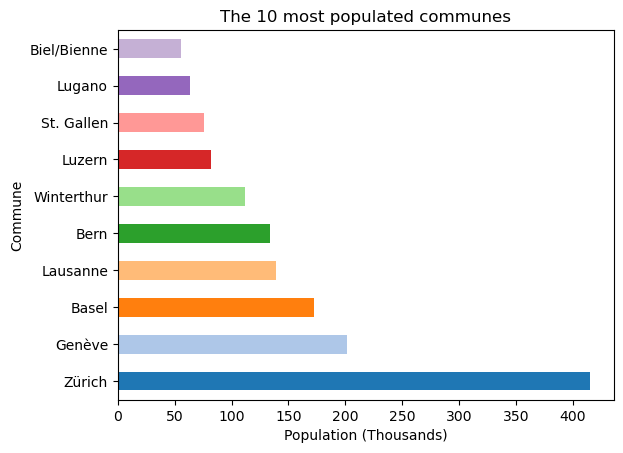

In [34]:
# Properties
colormap = plt.cm.tab20(range(0, len(values)))

# Horizontal bar plot
bar_plot = values.plot.barh(color=colormap)

# Add titles, labels, invert y-axis and colou to 
bar_plot.set_title("The 10 most populated communes") # Title
bar_plot.set_xlabel("Population (Thousands)") # # Title x-axis
plt.show(bar_plot)

## 2. For the top 10 populated communes of the previous step, your task now is to plot a horizontal stacked bar chart that shows how their lands are divided into the 4 area types: Settlement, Agricultural, Wooded, Unproductive. 

**Remember that these 4 area types represent the percentages and should add up to 100 for each commune. Ensure that the chart has an appropriate title, legend and labels. Your output should look like the following plot.**

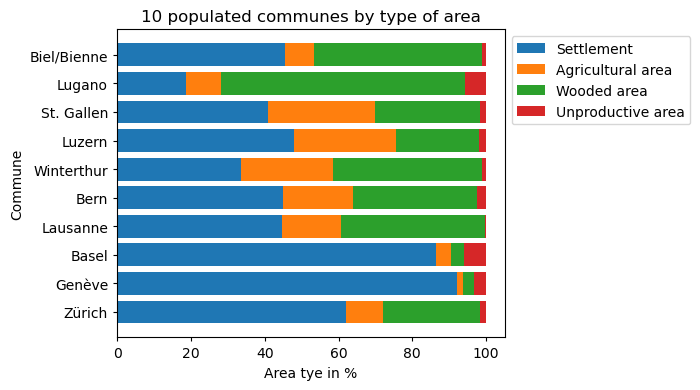

In [35]:
# Horizontal stacked bar chart

# Properties
fig, ax = plt.subplots(figsize=(5, 4)) 

# Horizontal stacked bar chart

ax.barh(most_populated_communes["Commune"], most_populated_communes["Settlement area"], color="#1F77B4", label="Settlement")
ax.barh(most_populated_communes["Commune"], most_populated_communes["Agricultural area"], left=most_populated_communes["Settlement area"], color="#FF7F0E", label="Agricultural area")
ax.barh(most_populated_communes["Commune"], most_populated_communes["Wooded area"], left=most_populated_communes["Settlement area"]+most_populated_communes["Agricultural area"], color="#2CA02C", label="Wooded area")
ax.barh(most_populated_communes["Commune"], most_populated_communes["Unproductive area"], left=most_populated_communes["Settlement area"]+most_populated_communes["Wooded area"]+most_populated_communes["Agricultural area"], color="#D62728", label="Unproductive area")

# Title of the plot, axes and labels 
ax.set_title("10 populated communes by type of area") # Title
ax.set_xlabel("Area tye in %") # Title x-axis
ax.set_ylabel("Commune") # Title y-axis
ax.tick_params(length=3, bottom=True, left=True) # Ref. Lenght and position of the ticks (https://bit.ly/3lksxU9)
ax.legend(bbox_to_anchor=(1, 1)) # Ref. Position of the legend (https://bit.ly/40Abqy2)
       
plt.show()

## 3. We are interested in the number of communes and their proportions of young residents (0-19yrs).

**Your task is to obtain a histogram that shows the number of communes for which this proportion falls into the following intervals: 5%-10%, 10%-15%, 15%-20%, 20%-25%, 25%-30%, 30%-35%.**

In [36]:
# Define bins
bins = [5, 10, 15, 20, 25, 30, 35]

In [37]:
# Create a new column with the bins range
df["Bins"] = pd.cut(df["0-19 years"], bins=bins, labels=False)

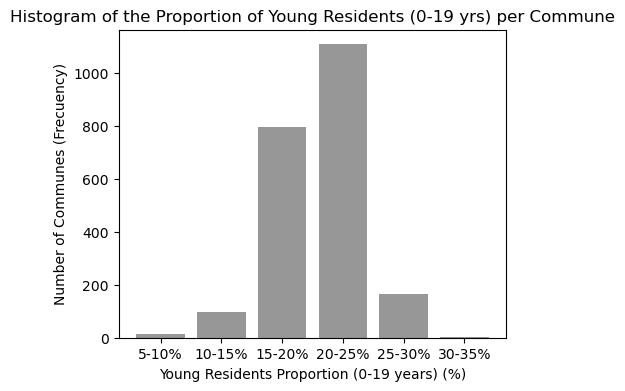

In [38]:
# Histogram of the proportion of young residents (0-19 yrs) per Commune

# Properties
fig, ax = plt.subplots(figsize=(5, 4)) 

# Histogram
ax.hist(df["Bins"], bins=np.arange(len(bins)) - 0.5, rwidth=0.8, align="mid", color ="#979797") 

# Title of the plot, axes and labels 
ax.set_title("Histogram of the Proportion of Young Residents (0-19 yrs) per Commune") # Title
ax.set_xlabel("Young Residents Proportion (0-19 years) (%)") # Title x-axis
ax.set_ylabel("Number of Communes (Frecuency)") # Title y-axis
ax.set_xticks([0,1,2,3,4,5])  # Labels x-axis
ax.set_xticklabels(["5-10%", "10-15%", "15-20%", "20-25%", "25-30%", "30-35%"]) # Labels x-axis 

plt.show()

## 4. Your task is to investigate the distributions of the age group 0-19 years, which is a numerical variable, across four language regions, which is a categorical variable.

**Hint: you can choose from Seaborn one of the violin plot, box plot or boxen plot for this purpose.**

As suggested, I have utilized a violin plot to respond to this question. To effectively distinguish the four language zones, I have color-coded the chart based on the colors of the flags representing the most significant municipalities. Additionally, I have renamed the codes of the four language zones to include the complete name, as I did in exercise 2.5, which provides a clearer understanding compared to the abbreviated code.

French-speaking communes have the highest proportion of population between 0 and 19 years of age, while Romansh-speaking cantons have the lowest proportion of population in this age range. 

In [39]:
# Import Seaborn
import seaborn as sns
# Import custome labels with matplotlib patches
import matplotlib.patches as patches

C:\Users\arayadah\Anaconda3\envs\adsml\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


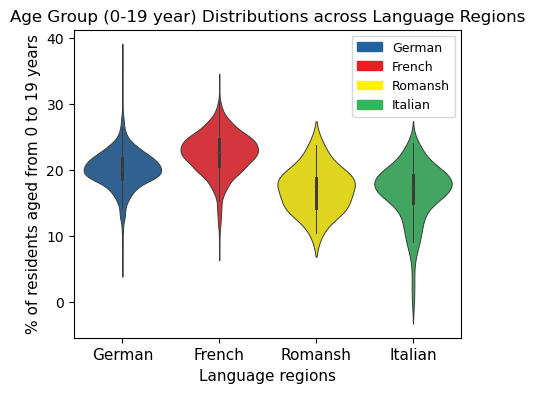

In [40]:
# Violin plot with Seaborn of the distribution of the percentage of residents aged 0-19 in the four linguistic regions.

# Properties
fig, ax = plt.subplots(figsize=(5, 4)) 
my_palette = ["#22629E", "#ED1C24", "#FFF200", "#32B65C"] # Colour palette

# Violin plot
violin_plot = sns.violinplot(data=df, 
                           x="Language", 
                           y="0-19 years", 
                           hue="Language",
                           linewidth=0.7,
                           palette=my_palette,
                           dodge=False,
                           ax=ax)

# Title of the plot, axes and labels 
ax.set_title("Age Group (0-19 year) Distributions across Language Regions", fontsize=12) # Title
ax.set_xlabel("Language regions", fontsize=11) # Title x axis
ax.set_ylabel("% of residents aged from 0 to 19 years", fontsize=11) # Title y axis
ax.set_xticklabels(["German", "French", "Romansh", "Italian"], fontsize=11) # Tabels x axis 
ax.legend(handles=[patches.Patch(color="#22629E", label="German"),
                   patches.Patch(color="#ED1C24", label="French"),
                   patches.Patch(color="#FFF200", label="Romansh"),
                   patches.Patch(color="#32B65C", label="Italian")],
                   fontsize=9) # Ref. legend (https://bit.ly/3X7Tfg5), Ref. color and labels with matplotlib patches (https://bit.ly/3Y9L2Jv)

plt.show()

## 5. Your task is to do the previous task for the three age groups 0-19 years, 20-64 years, and 65 years or over. 

**In order to make the comparison easy, you should make a plot with one subplot per age group (plot with 1 row and 3 columns). Ensure that the subplots have appropriate titles, legends, and labels. Also, ensure that they have proper sizes and there is enough space between them.**

* **The y-axis of the subplot should show the percentages of the populations for age groups, ranging from 0 to 80%. Hint: you can use sharey parameter of the subplot.**
* **Optional: add the observations into your subplot to see how they form the distributions. For instance, if you chose the box plot, you can draw a strip plot on the same axis as a complement to the box plot.**

To answer this question I have further developed the code from the prior exercice by utilizing sub-plots to generate a joint graph showcasing the percentage of the population in the age ranges 0-19, 20-64, and 65+. To ensure the graph's clarity, I have consistently applied the same range of colors mentioned previously, and added labels for the codes of the four language zones. Additionally, I have added a title to the group of graphs to provide a comprehensive overview of the information being presented. I have aldo adjusted the range on the y-axis as indicated to better visualize the differences between the age groups.

The graphs highlight the Italian-speaking cantons, which display a higher number of communes with outliers in the percentages studied. This is particularly evident in the percentage of the population aged 65+, where some communes have up to 80% of the population in this age range. Similarly, in the 20-64 population range, there are communes with less than 20% of the population in this age group. Furthermore, the Romansh and Italian-speaking regions have the highest proportion of the population aged 65+ and the lowest proportion of population aged 19 and below.

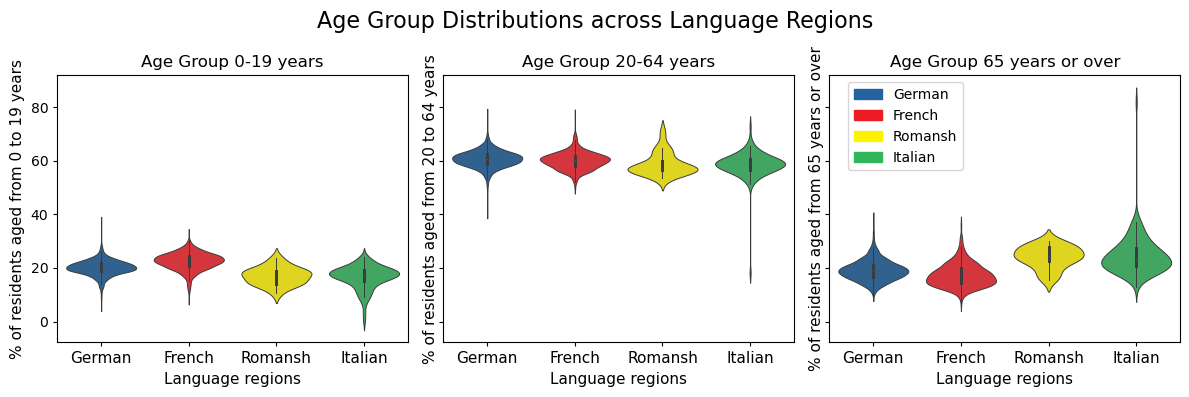

In [41]:
# Violin plot with Seaborn of the distribution of the distribution of the percentage of residents in the three age groups and the four linguistic regions.

# Properties
fig, axes = plt.subplots(nrows = 1,  # define number rows 
                         ncols = 3,  # define number of columns
                         figsize = (12, 4),
                         sharey=True) # define size of the figure, width and height in inches
fig.suptitle("Age Group Distributions across Language Regions", fontsize=16) # Main title
my_palette = ["#22629E", "#ED1C24", "#FFF200", "#32B65C"] # Colour palette

# Violin plot on the left    
violin_left=sns.violinplot(data=df, 
                           x="Language", 
                           y="0-19 years", 
                           hue="Language",
                           linewidth=0.7,
                           palette=my_palette,
                           dodge=False,
                           ax=axes[0])

axes[0].set_title("Age Group 0-19 years", fontsize=12) # Title
axes[0].set_xlabel("Language regions", fontsize=11) # Title x axis
axes[0].set_ylabel("% of residents aged from 0 to 19 years", fontsize=11) # Title y axis
axes[0].set_xticklabels(["German", "French", "Romansh", "Italian"], fontsize=11) # Tabels x axis
axes[0].tick_params(length=3, bottom=True, left=True) # Lenght and position of the ticks
axes[0].legend().set_visible(False) # set the legend location

# Violin plot on the centre
violin_centre=sns.violinplot(data=df, 
                           x="Language", 
                           y="20-64 years", 
                           hue="Language",
                           linewidth=0.7,
                           palette=my_palette,
                           dodge=False,
                           ax=axes[1],
                           legend=False)

axes[1].set_title("Age Group 20-64 years", fontsize=12) # Title
axes[1].set_xlabel("Language regions", fontsize=11) # Title x axis
axes[1].set_ylabel("% of residents aged from 20 to 64 years", fontsize=11) # Title y axis
axes[1].set_xticklabels(["German", "French", "Romansh", "Italian"], fontsize=11) # Tabels x axis 
axes[1].tick_params(length=3, bottom=True, left=True) # Lenght and position of the ticks
axes[1].legend().set_visible(False) # set the legend location


# Violin plot on the right
violin_right=sns.violinplot(data=df, 
                           x="Language", 
                           y="65 years or over", 
                           hue="Language",
                           linewidth=0.7,
                           palette=my_palette,
                           dodge=False,
                           ax=axes[2])

axes[2].set_title("Age Group 65 years or over", fontsize=12) # Title
axes[2].set_xlabel("Language regions", fontsize=11) # Title x axis
axes[2].set_ylabel("% of residents aged from 65 years or over", fontsize=11) # Title y axis
axes[2].set_xticklabels(["German", "French", "Romansh", "Italian"], fontsize=11) # Tabels x axis 
axes[2].tick_params(length=3, bottom=True, left=True) # Lenght and position of the ticks
axes[2].legend(bbox_to_anchor=(0.4, 1), handles=[patches.Patch(color="#22629E", label="German"),
                   patches.Patch(color="#ED1C24", label="French"),
                   patches.Patch(color="#FFF200", label="Romansh"),
                   patches.Patch(color="#32B65C", label="Italian")],
                   fontsize=10) 

fig.tight_layout()
plt.show()   

## 6. Your task is to use the pairplot from Seaborn and produce 3 plots to visually investigate the relation between the Agricultural area of communes and their Settlement area, Wooded area and the Unproductive area.


* **Are the relations linear?**
* **Use the Elevation as the color-code variable in the plot and show that communes that are located in high altitudes have very low Settlement and Agricultural areas, but have a lot of Unproductive areas.**

I have created two sets of plots to answer these questions. It was my understanding that it was necessary to plot a pairplot with the hue based on the elevation variable and a regression line between the x and y variables together. However, I encountered difficulties in plotting all these elements together using sns.pairplot. It is possible that my version of Seaborn ('0.11.2') is causing the problem, as the regression line was constructed between the elevation and the "y" variable rather than between the "x" and "y" variables. I also tried using sns.lmplot, but encountered the same problem, as the regression line was constructed between agricultural area and elevation.

In [42]:
sns.__version__

'0.11.2'

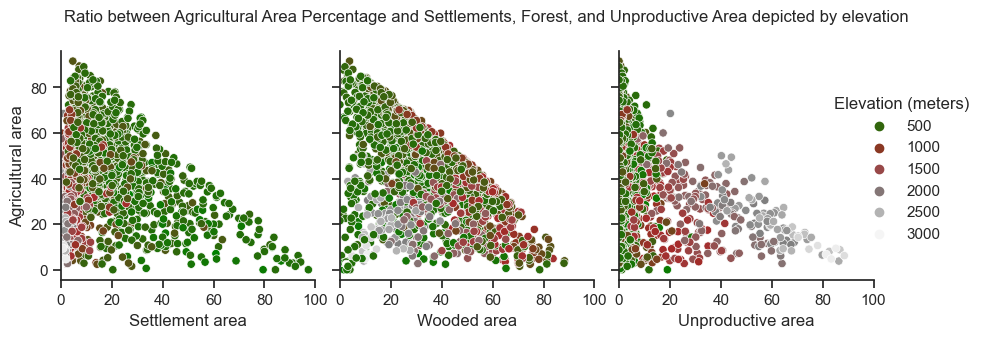

In [43]:
# Properties
sns.set_theme(style="ticks") # Ref. define common properties (https://bit.ly/40QFsOj)

# Pairplot 
pairplot_agro = sns.pairplot(df, 
                           hue="Elevation",
                           palette="blend:green,brown,grey,white", # I used this blend of colors but also terrain can be used here. 
                           x_vars=["Settlement area", "Wooded area", "Unproductive area"], 
                           y_vars=["Agricultural area"], 
                           height=3)

# Title of the plot, axes and labels
pairplot_agro.fig.suptitle("Ratio between Agricultural Area Percentage and Settlements, Forest, and Unproductive Area depicted by elevation", fontsize=12, y=1.1)
pairplot_agro._legend.set_title("Elevation (meters)")
pairplot_agro.set(xlim=(0, 100))

plt.show()

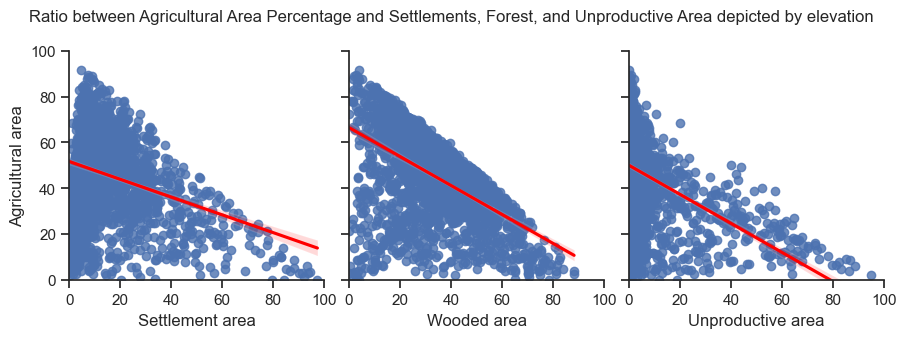

In [44]:
# Properties
sns.set_theme(style="ticks") # Ref. define common properties (https://bit.ly/40QFsOj)

# Pairplot 
pairplot_agro = sns.pairplot(df, 
                           x_vars=["Settlement area", "Wooded area", "Unproductive area"],
                           y_vars=["Agricultural area"], 
                           height=3, kind="reg", plot_kws={"line_kws":{"color":"red"}})

# Title of the plot, axes and labels
pairplot_agro.fig.suptitle("Ratio between Agricultural Area Percentage and Settlements, Forest, and Unproductive Area depicted by elevation", fontsize=12, y=1.1)
pairplot_agro.set(xlim=(0, 100))
pairplot_agro.set(ylim=(0, 100))

plt.show()

## 7. Your task is to draw a map of Switzerland using the East and North coordinates of communes. 

**Ensure that the plot has an appropriate title, legend and labels. Hint: you can use the Seaborn scatter plot for this task.**
**Use the Elevation as the color-code variable in the plot so that the you can see the three geographic regions, namely the Swiss Alps, the Central Plateau and the Jura. Your output should look like the following plot.
Re-do the same plot but this time with the Language as the color-code variable.**

I have created two maps using Seaborn's scatter plot. The color range in the first map was set to match the reference provided in the exercise "Elevation," while I adjusted the color range in the second map to be consistent with the previous exercises on the four language zones. Additionally, I modified the legends in the second map to display the full name of the language zones instead of just their codes.

In the first map, I was able to visualize the relief zones based on differences in elevation, as indicated by the dots' color range. On the other hand, the second map showcases the distribution of languages across the country, with strong clusters of language zones. By combining the observations from both maps, it is possible to see that topographical conditions play a significant role in the confinement of the Italian and Romansh-speaking areas.

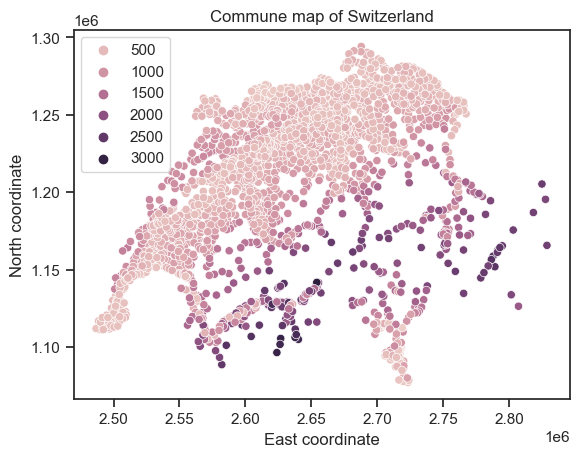

In [45]:
# Elevation map of Switzerland with Seaborn scatter diagram. This map was constructed as in the guide figure.  
# Properties
fig, ax = plt.subplots() 

# Scatterplot map
map_ch=sns.scatterplot(data=df, 
                       x="East coordinate", 
                       y="North coordinate", 
                       hue="Elevation", 
                       ax=ax)

# Title of the plot, axes and labels 
ax.set_title("Commune map of Switzerland", fontsize=12) # Title
ax.legend(title="", loc="upper left")
plt.show()

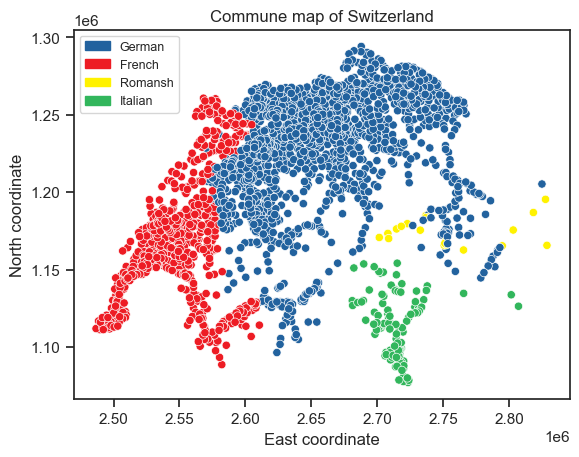

In [46]:
# For lenguage region map 

# Properties
fig, ax = plt.subplots() 
my_palette = ["#22629E", "#ED1C24", "#FFF200", "#32B65C"] # Colour palette

# Scatterplot map
map_ch=sns.scatterplot(data=df, 
                       x="East coordinate", 
                       y="North coordinate", 
                       hue="Language", 
                       palette=my_palette,
                       ax=ax)

# Title of the plot, axes and labels 
ax.set_title("Commune map of Switzerland", fontsize=12) # Title
ax.legend(handles=[patches.Patch(color="#22629E", label="German"),
                   patches.Patch(color="#ED1C24", label="French"),
                   patches.Patch(color="#FFF200", label="Romansh"),
                   patches.Patch(color="#32B65C", label="Italian")],
                   fontsize=9, title="", loc="upper left") 

plt.show()

## 8. Your task is to obtain the two plots from the previous task as subplots (with 1 row and 2 columns). 

**Ensure that the plots have appropriate titles, legends and labels. Also, ensure that they have proper sizes and there is enough space between them.**

Here I have generated two graphs with sub-plots to visualize the relationship between elevation and north and east coordinates, to be consistent the colour range is the same as in exercise C.6.

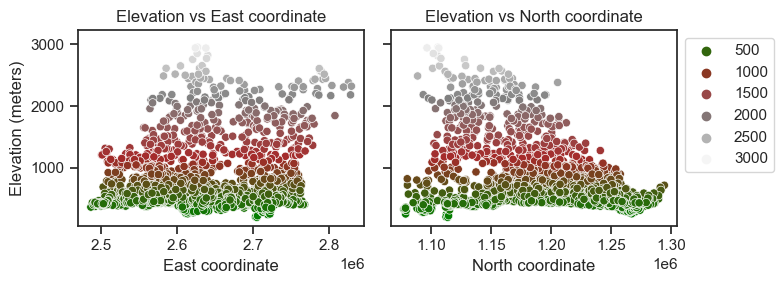

In [47]:
# Properties
fig, axes = plt.subplots(nrows = 1, # number of rows 
                         ncols = 2, #  number of columns
                         figsize = (8, 3), # define size of the figure, width and height in inches
                         sharey=True) # y-axis for all the plots

# East coordinate scatter plot
sns.scatterplot(data=df, 
                x="East coordinate", 
                y="Elevation", 
                hue="Elevation", 
                ax=axes[0], 
                palette="blend:green,brown,grey,white",
                legend=False)   

axes[0].set_title("Elevation vs East coordinate")
axes[0].set_xlabel("East coordinate")
axes[0].set_ylabel("Elevation (meters)")

# North coordinate scatter plot
sns.scatterplot(data=df, 
                x="North coordinate", 
                y="Elevation", 
                hue="Elevation",
                palette="blend:green,brown,grey,white",
                ax=axes[1])  
    
axes[1].set_title("Elevation vs North coordinate")
axes[1].set_xlabel("North coordinate")
axes[1].legend(bbox_to_anchor=(1, 1)) 

fig.tight_layout()
plt.show()

# D. Probabilities

**The objective of this task is to assess your understanding of the conditional probability, but it could be also considered as a data exploration question.**

**Compute the probability that a randomly selected commune with elevation over 2000 is from the canton of Valais.**

In [48]:
# Creation of a data frame with the municipalities with an altitude of over 2,000 metres
elev_over_2t = df[df["Elevation"] > 2000]

In [49]:
# Count the number of communes with elevations over 2,000 metres
number_over_2t = elev_over_2t.shape[0]
number_over_2t

96

In [50]:
# Selection of data for the canton of valais
valais_over_2t=elev_over_2t[elev_over_2t["Canton"] == "VS"]

In [51]:
# Count the number of communes in Valais with elevations over 2,000 metres
number_valais_over_2t = valais_over_2t.shape[0]
number_valais_over_2t

49

In [52]:
# Probability 
prob=round(number_valais_over_2t/number_over_2t, 2)
prob

0.51

# E. Matrices

**The objective of this task is to assess some of the skills you have learned in this course, but later on you will see that it becomes an important preprocessing step before using Machine Learning models.**

**Define a data frame matrix whose rows correspond to communes and the columns to the cantons. Fill in the matrix with 0/1 values where entry *(i,j)* is a 1 if the commune in row *i* is in the canton in column *j* and a 0 otherwise.**

To answer this question, I created two possible answers. 
1. The first one is based on a matrix, as indicated in the exercise. To do this, I constructed the arrays that constitute the matrix *"Communes and Canton"*, and then created the structure of the matrix. I populated it with a loop in which I identify where the communes and cantons are related, and assign a one to those related. For visualisation, I built a pivot table considering the cantons as columns, the municipalities as rows and the matrix data. 

In [53]:
# Selection of the variables to build the matrix arrays
communes=df["Commune"].values.tolist()
canton=df["Canton"].unique().tolist()

# Creation of the matrix structure
matrix = [[0 for i in range(len(canton))] for j in range(len(communes))] 

# Loop to populate the matrix with ones where the commune is located in the canton
for index, row in df.iterrows(): # iteration over rows Ref. (https://bit.ly/3jOJ2aH)
    canton_index = canton.index(row["Canton"]) # content of the row
    communes_index = communes.index(row["Commune"]) # content of the column
    matrix[communes_index][canton_index] = 1 # asignar uno cuando la comuna y el canton estan relacionados

# Pivot table with communes as index, cantons as columns and matrix as values.
df_matrix = pd.DataFrame(matrix, index=communes, columns=canton)
df_matrix

,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,FR,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,JU
Aeugst am Albis,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Affoltern am Albis,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bonstetten,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hausen am Albis,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hedingen,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vendlincourt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Basse-Allaine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Clos du Doubs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Haute-Ajoie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


2. My second answer, using a pivot table to explore the relationship between municipalities and cantons, this answer is based on the original data frame and not on a matrix. Not exactly what this exercise is looking for, but it was a good exercise for me to record and see if the same result could be achieved with another approach. I simply count here where the municipalities match the canton, and where they do not, I add the value zero. 

In [54]:
df_pivot_table = df.pivot_table(index="Commune", columns="Canton", aggfunc="size").fillna(0).astype(int) 
df_pivot_table

Canton,AG,AI,AR,BE,BL,BS,FR,GE,GL,GR,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
Commune,,,,,,,,,,,,,,,,,,,,,
Aadorf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Aarau,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aarberg,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aarburg,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aarwangen,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zwieselberg,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zwingen,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zwischbergen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
